In [5]:
import pandas as pd

df = pd.read_parquet("../data/processed/gdelt/gdelt_events.parquet")
df.shape, df.head()


((3298, 15),
     event_id event_date actor1_name actor1_country actor2_name actor2_country  \
 0  410446832 2014-02-19        None           None   AUSTRALIA            AUS   
 1  410446833 2014-02-19        None           None    SHANGHAI            CHN   
 2  410446834 2014-02-19        None           None     STUDENT           None   
 3  410446835 2014-02-19        None           None       PARIS            FRA   
 4  410446836 2014-02-19        None           None      NAPLES            ITA   
 
   geo_country  geo_lat  geo_long  event_code  impact_score  num_mentions  \
 0          AS -27.0000   133.000          10           0.0             2   
 1          CH  31.2222   121.458          42           1.9             8   
 2          US  44.4996  -122.585          40           1.0             2   
 3          CH  35.0000   105.000          53           3.8            10   
 4          UK  54.0000    -2.000          42           1.9            10   
 
    num_sources  num_articles

In [6]:
df.info()
df.describe(include='all').T.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3298 entries, 0 to 3297
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        3298 non-null   int64         
 1   event_date      3298 non-null   datetime64[ns]
 2   actor1_name     2972 non-null   object        
 3   actor1_country  1780 non-null   object        
 4   actor2_name     2295 non-null   object        
 5   actor2_country  1397 non-null   object        
 6   geo_country     3199 non-null   object        
 7   geo_lat         3199 non-null   float64       
 8   geo_long        3199 non-null   float64       
 9   event_code      3298 non-null   int64         
 10  impact_score    3298 non-null   float64       
 11  num_mentions    3298 non-null   int64         
 12  num_sources     3298 non-null   int64         
 13  num_articles    3298 non-null   int64         
 14  avg_tone        3298 non-null   float64       
dtypes: d

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
event_id,3298.0,NaN,NaN,NaN,410448480.5,410446832.0,410447656.25,410448480.5,410449304.75,410450129.0,952.194921
event_date,3298,NaN,NaN,NaN,2015-02-11 02:17:06.076410112,2014-02-19 00:00:00,2015-02-19 00:00:00,2015-02-19 00:00:00,2015-02-19 00:00:00,2015-02-19 00:00:00,NaN
actor1_name,2972,553,UNITED STATES,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actor1_country,1780,92,USA,686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actor2_name,2295,492,UNITED STATES,223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actor2_country,1397,88,USA,479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geo_country,3199,102,US,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geo_lat,3199.0,NaN,NaN,NaN,29.523509,-42.5167,23.0,37.768,42.25545,69.1609,23.112902
geo_long,3199.0,NaN,NaN,NaN,-8.99717,-157.531,-82.7755,3.39583,38.1012,175.867,81.824283
event_code,3298.0,NaN,NaN,NaN,94.085203,10.0,26.0,43.0,111.0,1831.0,178.801792


In [7]:
country_summary = (
    df.groupby("geo_country")
      .agg(
          events=("event_id", "count"),
          avg_impact=("impact_score", "mean"),
          avg_tone=("avg_tone", "mean")
      )
      .sort_values("events", ascending=False)
      .head(10)
)

country_summary


,events,avg_impact,avg_tone
geo_country,,,
US,1249,0.648759,-2.194752
AS,165,0.552121,-1.893789
IN,131,1.162595,-2.023488
TU,120,-1.228333,-4.732748
UK,113,2.108850,-0.552481
RS,80,-0.807500,-2.964493
NI,73,-2.256164,-3.835656
SY,65,-0.169231,-4.632071
CH,62,1.254839,1.405012


In [8]:
actor_summary = (
    df[df["actor2_name"].notna()]
      .groupby("actor2_name")
      .agg(events=("event_id", "count"))
      .sort_values("events", ascending=False)
      .head(10)
)

actor_summary


,events
actor2_name,
UNITED STATES,223
GOVERNMENT,56
POLICE,46
AUSTRALIA,42
SCHOOL,32
TURKEY,30
UNITED KINGDOM,26
RUSSIA,26
AUSTRALIAN,25


In [9]:
neg_df = df[df["avg_tone"] < 0]

neg_by_country = (
    neg_df.groupby("geo_country")
          .agg(events=("event_id", "count"))
          .sort_values("events", ascending=False)
          .head(10)
)

neg_by_country


,events
geo_country,
US,864
TU,116
AS,113
IN,79
RS,64
NI,63
SY,63
UK,54
EG,50


In [10]:
import numpy as np

# 1) Compute per-country stats
country_stats = (
    df.groupby("geo_country")
      .agg(
          total_events=("event_id", "count"),
          neg_events=("event_id", lambda x: ((df.loc[x.index, "avg_tone"] < 0)).sum()),
          avg_tone=("avg_tone", "mean"),
          avg_impact=("impact_score", "mean")
      )
)

country_stats["neg_ratio"] = country_stats["neg_events"] / country_stats["total_events"]

country_stats.sort_values("neg_events", ascending=False).head(10)


,total_events,neg_events,avg_tone,avg_impact,neg_ratio
geo_country,,,,,
US,1249,864,-2.194752,0.648759,0.691753
TU,120,116,-4.732748,-1.228333,0.966667
AS,165,113,-1.893789,0.552121,0.684848
IN,131,79,-2.023488,1.162595,0.603053
RS,80,64,-2.964493,-0.807500,0.800000
SY,65,63,-4.632071,-0.169231,0.969231
NI,73,63,-3.835656,-2.256164,0.863014
UK,113,54,-0.552481,2.108850,0.477876
EG,50,50,-5.654340,-0.510000,1.000000


In [11]:
# 2) Compute global thresholds
neg_events_thresh = country_stats["neg_events"].median()
neg_ratio_thresh = country_stats["neg_ratio"].median()

neg_events_thresh, neg_ratio_thresh


(np.float64(6.0), np.float64(0.9340579710144927))

In [12]:
# 3) Detection: countries with both high negative volume and high negative ratio
alerts = country_stats[
    (country_stats["neg_events"] >= neg_events_thresh) &
    (country_stats["neg_ratio"] >= neg_ratio_thresh)
].sort_values("neg_events", ascending=False)

alerts


,total_events,neg_events,avg_tone,avg_impact,neg_ratio
geo_country,,,,,
TU,120,116,-4.732748,-1.228333,0.966667
SY,65,63,-4.632071,-0.169231,0.969231
EG,50,50,-5.654340,-0.510000,1.000000
ID,50,50,-4.768262,-1.330000,1.000000
SZ,46,43,-2.934011,0.076087,0.934783
UP,43,43,-4.115825,-0.048837,1.000000
LY,34,34,-4.028564,1.085294,1.000000
NZ,35,34,-3.601728,1.011429,0.971429
MX,33,31,-4.910519,-0.354545,0.939394


In [13]:
for country, row in alerts.head(10).iterrows():
    print(
        f"[ALERT] Country={country} | "
        f"NegEvents={row.neg_events} / {row.total_events} "
        f"({row.neg_ratio:.2%}) | "
        f"AvgTone={row.avg_tone:.2f} | "
        f"AvgImpact={row.avg_impact:.2f}"
    )


[ALERT] Country=TU | NegEvents=116.0 / 120.0 (96.67%) | AvgTone=-4.73 | AvgImpact=-1.23
[ALERT] Country=SY | NegEvents=63.0 / 65.0 (96.92%) | AvgTone=-4.63 | AvgImpact=-0.17
[ALERT] Country=EG | NegEvents=50.0 / 50.0 (100.00%) | AvgTone=-5.65 | AvgImpact=-0.51
[ALERT] Country=ID | NegEvents=50.0 / 50.0 (100.00%) | AvgTone=-4.77 | AvgImpact=-1.33
[ALERT] Country=SZ | NegEvents=43.0 / 46.0 (93.48%) | AvgTone=-2.93 | AvgImpact=0.08
[ALERT] Country=UP | NegEvents=43.0 / 43.0 (100.00%) | AvgTone=-4.12 | AvgImpact=-0.05
[ALERT] Country=LY | NegEvents=34.0 / 34.0 (100.00%) | AvgTone=-4.03 | AvgImpact=1.09
[ALERT] Country=NZ | NegEvents=34.0 / 35.0 (97.14%) | AvgTone=-3.60 | AvgImpact=1.01
[ALERT] Country=MX | NegEvents=31.0 / 33.0 (93.94%) | AvgTone=-4.91 | AvgImpact=-0.35
[ALERT] Country=DA | NegEvents=25.0 / 25.0 (100.00%) | AvgTone=-5.97 | AvgImpact=-2.66


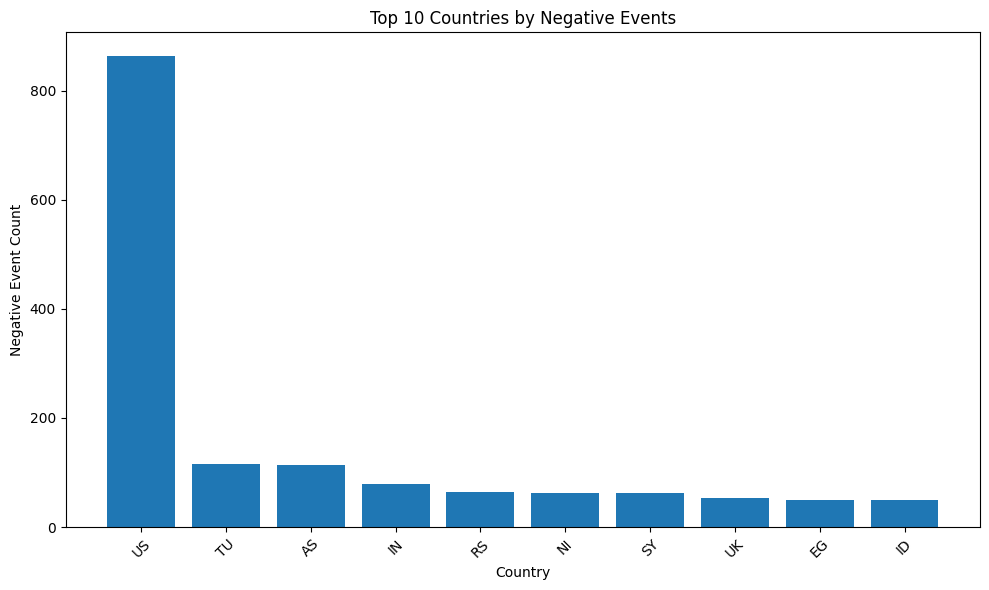

In [14]:
import matplotlib.pyplot as plt

# Take top 10 from your neg_by_country summary
top_neg = neg_by_country.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_neg.index, top_neg['events'])
plt.title("Top 10 Countries by Negative Events")
plt.xlabel("Country")
plt.ylabel("Negative Event Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


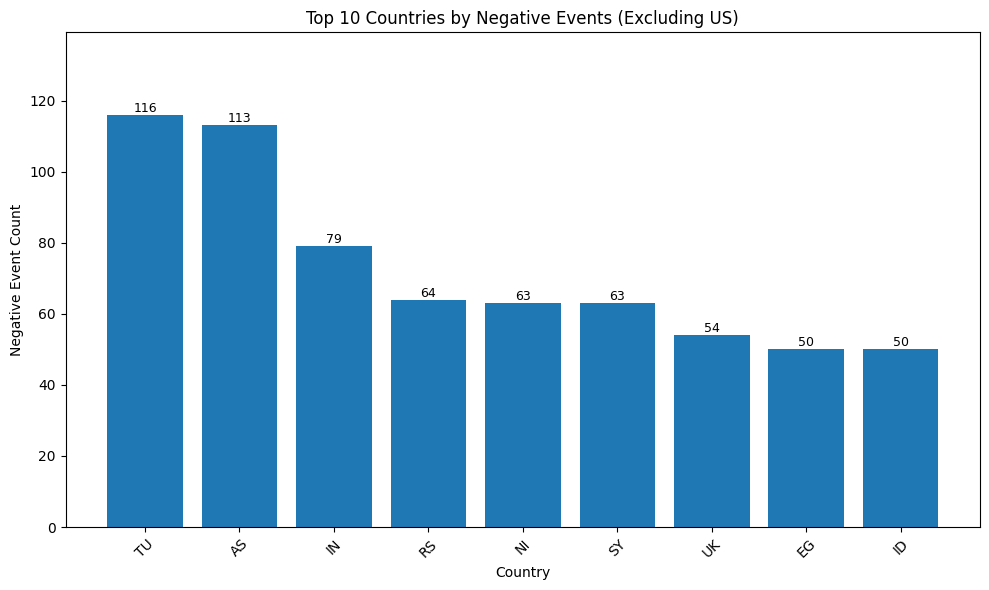

In [19]:
# Focus on countries 2–10 (exclude US to see others clearly)
top_neg_others = top_neg[top_neg.index != "US"]

plt.figure(figsize=(10, 6))
bars = plt.bar(top_neg_others.index, top_neg_others["events"])
plt.title("Top 10 Countries by Negative Events (Excluding US)")
plt.xlabel("Country")
plt.ylabel("Negative Event Count")
plt.xticks(rotation=45)
plt.ylim(0, top_neg_others["events"].max() * 1.2)

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()
plt.show()


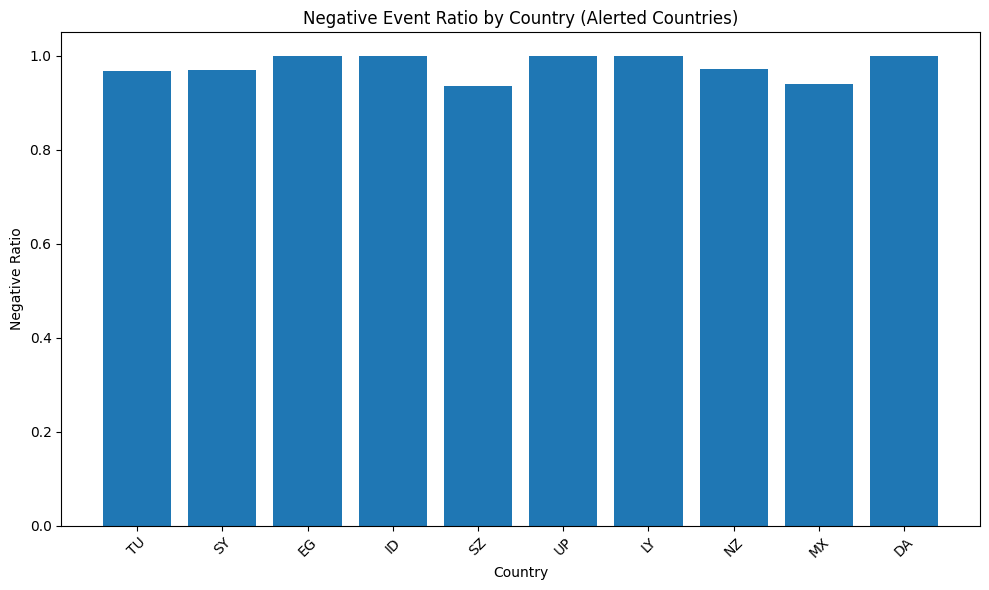

In [15]:
# Use the alerts table we already created
alert_plot = alerts.head(10)

plt.figure(figsize=(10,6))
plt.bar(alert_plot.index, alert_plot['neg_ratio'])
plt.title("Negative Event Ratio by Country (Alerted Countries)")
plt.xlabel("Country")
plt.ylabel("Negative Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


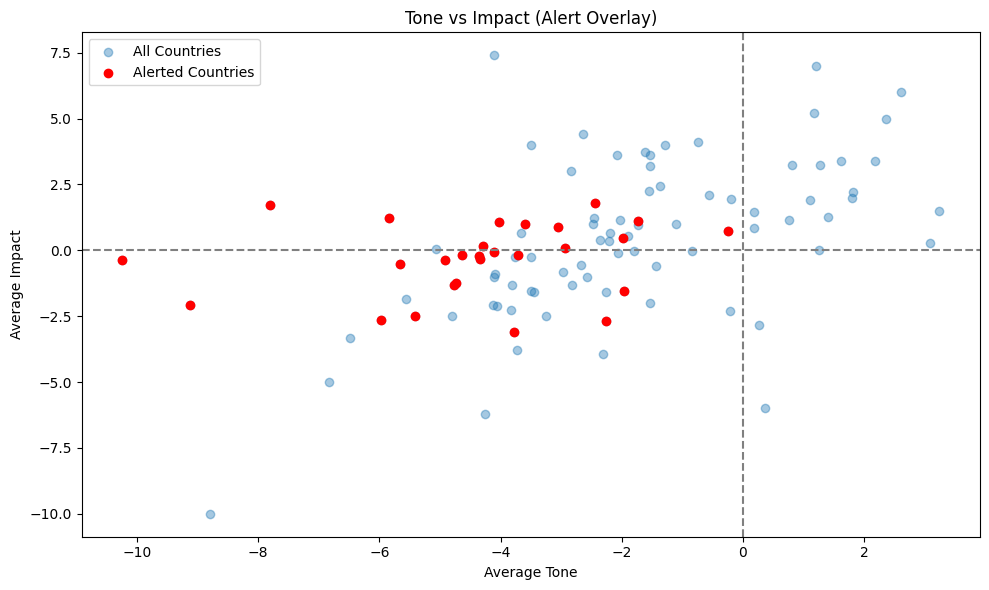

In [17]:
plt.figure(figsize=(10,6))

# scatter all countries
plt.scatter(country_stats['avg_tone'], country_stats['avg_impact'], alpha=0.4, label="All Countries")

# scatter alert countries in red
alert_countries = alerts.index
plt.scatter(
    country_stats.loc[alert_countries]['avg_tone'],
    country_stats.loc[alert_countries]['avg_impact'],
    color='red', label="Alerted Countries"
)

plt.title("Tone vs Impact (Alert Overlay)")
plt.xlabel("Average Tone")
plt.ylabel("Average Impact")
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()
